# Clustering cities near military base for ease of Permenant Change of Station (PCS)

### Coursera Final IBM Data Science Project
#### Liz M.

## 1. Introduction

### 1.1 Background
Hundreds of families are moved across the country and the world every year following the call of their nation. When military members get orders for a new location, their whole family (whether that includes children, spouses, pets) usually all go with them. This is a very difficult time for these individuals because they have to uproot their lives and move to a new city, state, or country. Some families decide to buy homes where their new duty station is located, and these people are the focus of this report. Military bases can have several towns located around it and finding what towns work best for each family can be difficult especially since these individuals may have never moved to this location before. 
### 1.2 Problem
One such military base is in Maryland located between Baltimore and Washington DC, called Fort Meade and this is the base this report will focus on. The goal of this project is to cluster towns from the closest counties to Fort Meade to give moving families group of towns that are similar to start their house buying search. Homebuying can be daunting in an unknown area but having a group of similar towns based on places located in the towns and then the break down of these clusters with home prices can make it easier for families to narrow down where to search for a home.

## 2. Data acquisition and Cleaning

### 2.1 Data Sources
City names and counties were scraped from zipcodestogo.com with a focus on the state of Maryland. Latitude and Longitude coordinates were acquired through the geopy.geocoders package. THe venue data was acquired from the Foursquare API. Finally, home prices were acquired through zillow's Home Value Index for all homes sorted by cities in the US.

### 2.2 Data Cleaning
Any data downloaded or scraped from various sources was eventually combined into one table so the data had to be cleaned in order to fit correctly.

The zipcodestogo data had to be narrowed down to just the city and county information. The zip codes and zipcode map columns were removed because we did not use zip codes for locations. ALso when the table was brought in the column labels were on the second row instead of the header so this was remedied as well. Since the original data relied on zip codes, there were several duplicate rows once the zip code columns were removed. The original data included all counties in Maryland. We kept all counties that surrounded Fort Meade which included: Prince Georges, Howard, Anne Arundel, Montgomery, Baltimore, and Baltimore City. After keeping these counties, two non cities had to be removed: Souther Md Facility and Suburb Maryland Fac. 

THe geopy data was checked for missing data and cities located in multiple counties had the same latitude and longitude so any extras were removed. 
After the cluster analysis was completed any cities without a cluster assignment, likely due to Foursquare not finding enough locations surround the town, were removed.

THe zillow csv was narrowed down to towns just located in Maryland and then the Region Name column was renamed to city before the zillow data could be merged into our venue data. After merging on city, RegionID, SizeRank, RegionType, StateName, Metro, and all housing prices before 5/31/2020 were removed due to not being needed in the data.

## 3. Clustering models

### 3.1 Within-CLuster-Sum-of-Squares (WCSS)
We needed to determine for this project the ideal number of clusters for this particular dataset since we decided to use K-Means clustering. The WCSS was first calculated for 2 clusters to 21 clusters using our town data. Next we found the optimal number of clusters using the elbow method and the formula for the distance between a point and a line.
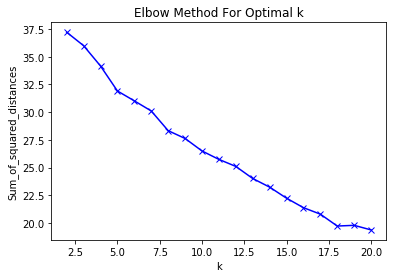
As you can see it was not very clear what would be considered the best elbow for this dataset. To solve this problem we calculated the distance between a point and a line as determined by the below equation:
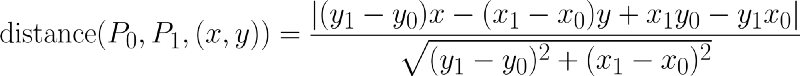
The shortest distance was for k=8, so we ran the model with 8 clusters.

### 3.2 Cluster results
With the optimal clustering being 8, we ran the dataset through and the towns were split into clusters based on their top ten venues. After the clusters were broken up the average home values for each town in each cluster were added. 

Cluster 1 was made up of 28 different cities from 5 different counties with Baltimore County being the most frequent county. Some of the most frequent top venues included a park, flea market, farmers market, a flower shop, and a fast food restaurant. The median home price in this cluster is \\$432,074. Median is used help with any outliers.

Cluster 2 consisted of only 2 cities in different counties but the top venue for both was a lake. the median home price was \\$1,189,614. With only two data points this is highly scewed since the individual cities had vary different home prices with one being \\$599,961 and the other being \\$1,779,266.

Cluster 3 consisted of 76 different cities from 6 different counties, with Baltimore county being the most frequent. For venues the most frequent venues amongst the cluster was a Pizza Place, an American Restaurant, and a Flower Shop. The median home price was \\$401,542.

Cluster 4 also only contained two cities from two separate counties and had a park and flower shop as the most frequent venues. The median house price was \\$566,236.

Cluster 5 consisted of 7 cities in 4 different counties with Anne Arundel being the most frequent. The most common venues included a Business service, a park, and a farmers market. Median home price was \\$420,707.

Cluster 6 only included the city of Jessup in Howard county with an average home price of \\$374,226 and common venues of a train station, yoga studio, and flea market.

Cluster 7 included two cities in separate counties that include the same common venues across the board including a dance studio, frozen yogurt shop, and a french restaurant. They did have different home values with a median home value of  \\$417,463.

Cluster 8 included again two cities in two separate counties. The frequent venues between the two is a golf course. The median home value is \\$363,615.

## 4. Conclusions
In this study, we looked at clustering the surround towns of Fort Meade, MD to find similar cities to help families undergoing PCS to shop for homes in similar areas. Of the 117 towns included in this study 104 of them were in just two clusters. Most clusters had an average home prices in the \\$400,00s. It is possible that when we pulled latitude and longitude coordinates that city locations could have gotten mixed up or called wrong. Geopy is known for not always for being accurate and when mapped out it seems some cities may not be located correctly. This could skew the venue data since it's based off of the latitude and longitude. The other issues could be that for certain cities not much Foursquare data exists or towns that are close by could easily have overlapping venues. In conclusion, if PCSing to Fort Meade, the average home value in the surrounding area is in the \\$400,000s and the vast majority of towns fall within two clusters many towns in the area are very similar.

## 5. Future Direction
It would be nice to have more accurate location data for the towns and paying for an API such as Google can help with this. Other things we would like to include in the future are things like crime data, school data, and things such as walking scores just to get a better idea of the cities which could hopefully better cluster the towns. Finally, not all persons PCSing are looking to buy, including average rent for the towns could also help future renters.